#### Etapa preliminar - Equação de advecção pura 

Desenvolver um sistema para resolução da equação de advecção pura, para melhor compreensão das ferramentas necessárias e do método 

Equação avecção pura 1-D:

\begin{equation}
    \frac{dC}{dt} + c\frac{dC}{dx} = 0
\end{equation}

Solução analítica:

\begin{equation}
    C(x,t) = C_{0}(x - ct)
\end{equation}

Condição inicial:

\begin{equation}
    C(x,t=0) = C_{0}(t)
\end{equation}

Condição de contorno:

\begin{equation}
    C(x=x_{inicial},t) = 0
\end{equation}

\begin{equation}
    C(x=x_{final}, t) = 0
\end{equation}






In [ ]:
# Solução numérica

# TDMA solver

# Malha
x0 =0
L = 100.0
nx = 100.0 # number of nodes
t_max = 100.0
nt = 100.0
t0 = 0

dx = L/ nx
dt = t_max / nt

x = np.arange(x0, L, dx)
t = np.arange(0, t_max, dt)


# Constantes do sistema
u = 0.5

# Condição inicial 

C_0 = 10

# Condição de contorno

C_x0 = 0
C_xn = 0

n = len(t) # numeros de elementos nas diagonais

# lista/array vazio para cada elemento 

D = np.zeros(n) # valores da diagonal principal
beta = np.zeros(n) # valores da diagonal inferior - lembrar que beta é 0 na primeira iteração
alfa = np.zeros(n) # valores da diagonal superior - lembrar que alfa é 0 na ultima iteração
k = np.zeros(n) # valores da constante à direita - solução

X = np.zeros(n)

def tdma(a, b, c, d):
    """Solution of a linear system of algebraic equations with a
        tri-diagonal matrix of coefficients using the Thomas-algorithm.

    Args:
        a(array): an array containing lower diagonal (a[0] is not used)
        b(array): an array containing main diagonal 
        c(array): an array containing lower diagonal (c[-1] is not used)
        d(array): right hand side of the system
    Returns:
        x(array): solution array of the system
    
    """
    
    n = len(b)
    x = np.zeros(n)
    
    # elimination:
    
    for k in range(1,n):
        q = a[k]/b[k-1]
        b[k] = b[k] - c[k-1]*q
        d[k] = d[k] - d[k-1]*q
    
    # backsubstitution:
    
    q = d[n-1]/b[n-1]
    x[n-1] = q
    
    for k in range(n-2,-1,-1):
        q = (d[k]-c[k]*q)/b[k]
        x[k] = q
    
    
    return x

#### Trabalho 3

Desenvolver um modelo numérico 1D para estudar o transporte de sal. O modelo
desenvolvido deve ser aplicado em um canal com geometrias:

    Extensão de 100900,0 m

    1000,0 m de largura 

    Seção transversal retangular

    4,0 m de profundidade

    Na entrada do canal há uma contração localizada à 400,0 m da seção 1 (L1). A contração possui 500,0 m de extensão e largura 

#### Solução analítica

A equação de advecção-difusão 1D:


\begin{equation}
    \frac{dC}{dt} + c\frac{dC}{dx} = D*\frac{d^{2}C}{dx^{2}}
\end{equation}

Com as seguintes condições iniciais e de contorno:

\begin{equation}
    C(x,t=0) = C_{0}(t)
\end{equation}

Condição de contorno:

\begin{equation}
c(0, t)=\left\{\begin{array}{lc}c_{0} & 0 < t < t_{0} \\
0 & t>t_{o}\end{array}\right.
\end{equation}

\begin{equation}
\frac{\partial c}{\partial x}(\infty, t)=0
\end{equation}




Solução :

\begin{equation}
\begin{aligned}
&c(x, t)=\\ &\left\{\begin{array}{l}\frac{\gamma}{\mu}+\left(C_{i}-\frac{\gamma}{\mu}\right)*A(x, t)+\left(C_{0}-\frac{\gamma}{\mu}\right)*B(x, t) & 0 < t < t_{0} \\
\frac{\gamma}{\mu}+\left(C_{i}-\frac{\gamma}{\mu}\right) * A(x, t)+\left(C_{0}-\frac{\gamma}{\mu}\right)* B(x, t)-C_{0} *B\left(x, t-t_{0}\right) & t>t_{0}\end{array}\right.
\end{aligned}
\end{equation}

Onde

A(x,t):

\begin{equation}
\begin{aligned}
A(x, t)=\exp (-\mu t / R)\left\{1-\frac{1}{2} \operatorname{erfc}\left[\frac{\mathrm{Rx}-\mathrm{v} t}{2(\mathrm{DRt})^{1 / 2}}\right]\right.\\
&-\frac{1}{2} \exp (\mathrm{vx} / \mathrm{D}) \operatorname{erfc} \left[\frac{\mathrm{Rx}+\mathrm{v} t}{2(\mathrm{DRt})^{1 / 2}}\right]

\end{aligned}
\end{equation}

B(x,t):


\begin{equation}
\begin{aligned}
B(x, t) &=\frac{1}{2} \exp \left[\frac{(v-u) x}{2 D}\right] \operatorname{erfc}\left[\frac{R x-u t}{2(D R t)^{1 / 2}}\right] \\
&+\frac{1}{2} \exp \left[\frac{(v+u) x}{2 D}\right] \operatorname{erfc}\left[\frac{R x+u t}{2(D R t)^{1 / 2}}\right]
\end{aligned}
\end{equation}

\begin{equation}
u=v\left(1+\frac{4 \mu \mathrm{D}}{v^{2}}\right)^{1 / 2}
\end{equation}

####  Solução numérica 

Para U 0 :

\begin{equation}
C_{j+1}^{n+1}*(\alpha - \beta) + C_{j}^{n+1}* (1- \alpha +2*\beta) + C_{j-1}^{n+1} *(-\beta) = C_{j}^{n} 
\end{equation}

Para U 0 :

\begin{equation}
C_{j+1}^{n+1}*(- \beta) + C_{j}^{n+1}* (1 + \alpha +2*\beta) + C_{j-1}^{n+1} *(-\alpha -\beta) = C_{j}^{n} 
\end{equation}

In [ ]:
#===============================================================
# Some libraries
#===============================================================

import matplotlib.pyplot as plt
import numpy as np
from numpy import zeros

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Define parameters
#===============================================================

D     = 0.01                          # Diffusivity
Nx    = 101                           # Number of grid points
xmax  = 10.                           # Domain limit to the right
xmin  = 0.                            # Domain limit to the left
dx    = (xmax-xmin)/(Nx-1)            # Mesh size
x     = np.linspace(xmin,xmax,Nx)     # Discretized mesh
t_end = 5.                            # Final time
dt    = 0.001                         # Time step 
Nt    = int(t_end/dt)                 # Number of iterations
t     = np.linspace(0.,t_end,Nt+1)    # Time vector
c     = 0.5                           # Celeridade do fluxo
alfa  = c*dt/dx                       # Stability condition - Udt/dx
beta  = D*dt/(dx**2)                  # Stability condition - Ddt/dx^2
T1    = - beta                        # Diagonal inferior 
T2    = 1 - alfa + 2*beta             # Diagonal meio
T3    = alfa - beta                   # Diagonal superior
U     = zeros((2,Nt+1), float)        # Matriz resultado

#===============================================================
# Initial condition
#===============================================================

# def CI(x):                      # define a condição inicial
#   if xmin <= x <= xmax:
#     return 2.0*x*(1.0-x)          
#   else:
#     return 0.0

# for i in range(Nx+1):           # monta a condição inicial
#   xi = i*dx
#   U[0,i] = CI(xi)

U[0,:] = 0                        # Inserir o que define a C.I

#===============================================================
# Stability check
#===============================================================

courant = c*dt/dx                 # Número de Courant <= 1
if courant <= 1:
  print('Courant: OK')
else:
  print('Courant: Corrigir')

pe = c * dx /D                    # Núemro de pèclet <= 2
if pe <= 2:
  print('Pèclet: OK')
else:
  print('Pèclet: Corrigir')

neumann = D *dt/dx**2             # Von Neumann <= 1/2
if neumann <= 0.5:
  print('Neumann: OK')
else:
  print('Neumann: Corrigir')

#===============================================================
# Temporal loop
#===============================================================



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import scipy.sparse as sp
import scipy.sparse.linalg 
import scipy.linalg as la
# import dolfin
# import mshr

Estrutura da matriz A*u = b

0.012657628928887924

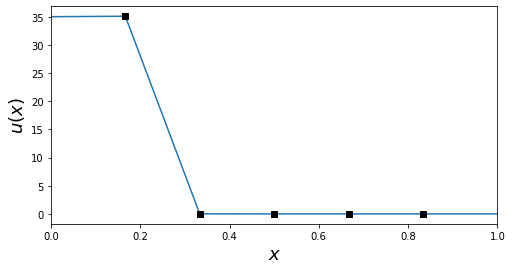

In [24]:
N = 5                                                       # Number of interior points

t_end = 5.                                                  # total time
dt    = 0.001                                               # Time step 
Nt    = int(t_end/dt)                                       # Number of iterations
t     = np.linspace(0.,t_end,Nt+1)                          # Time vector

xmin = 0.
xmax = 1.0                                                    # Length of the system
dx = (xmax-xmin) / (N + 1)                                         # x step size
D     = 0.01                                                # Diffusivity
c     = 0.5                                                 # Celeridade do fluxo

alfa  = c*dt/dx                                             # Stability condition - Udt/dx
beta  = D*dt/(dx**2)                                        # Stability condition - Ddt/dx^2

T1    = - beta                                              # Diagonal inferior 
T2    = 1 - alfa + 2*beta                                   # Diagonal meio
T3    = alfa - beta                                         # Diagonal superior

A = (sp.eye(N, k=-1)*T1 + sp.eye(N)*T2 + sp.eye(N, k=1)*T3) # Matrix 2D para as iterações

b = np.zeros(N)                                              # Matriz resultado

def CI(x):                                                 # define a condição inicial
    if xmin <= x <= xmax:
        return 0.0          
    else:
      return 0.0

for i in range(N):                                         # monta a condição inicial
   xi = i*dx
   b[i] = CI(xi)
b[0] =  35
b[N-1] = 0


u0, u1 = 35, 0                                               # Boundary conditions

u = sp.linalg.spsolve(A, b) # la.solve(A, b)                # Matriz de interesse - resposta
x = np.linspace(0., xmax, N+2)                              # pontos da malha discretizados incluindo os c/ C.C
U = np.hstack([[u0], u, [u1]])                              # Matriz final com os valores das C.C e pontos internos

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, U)
ax.plot(x[1:-1], u, 'ks')
ax.set_xlim(0, 1)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$u(x)$", fontsize=18)
u[1]

In [ ]:
#===============================================================
# Some libraries
#===============================================================
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.mplot3d
import scipy.sparse as sp
import scipy.sparse.linalg 
import scipy.linalg as la

#===============================================================
# Define parameters
#===============================================================
D     = 0.01                          # Diffusivity
Nx    = 101                           # Number of grid points
xmax  = 10.                           # Domain limit to the right
xmin  = 0.                            # Domain limit to the left
dx    = (xmax-xmin)/(Nx-1)            # Mesh size
x     = np.linspace(xmin,xmax,Nx)     # Discretized mesh
t_end = 5.                            # Final time
dt    = 0.001                         # Time step 
Nt    = int(t_end/dt)                 # Number of iterations
t     = np.linspace(0.,t_end,Nt+1)    # Time vector
c     = 0.5                           # Celeridade do fluxo
alfa  = c*dt/dx                       # Stability condition - Udt/dx
beta  = D*dt/(dx**2)                  # Stability condition - Ddt/dx^2
T1 = np.zeros(N)                      # Diagonal inferior
for i in range(N):
   if i == 0:
      T1[i]    = 0                                               
   else:
      T1 [i] = -beta
T2 = np.zeros(N)                      # Diagonal meio
T2[:]    = 1 - alfa + 2*beta                                   
 
T3 = np.zeros(N)                      # Diagonal superior
for i in range(N):                     
   if i == N-1:
      T3[i]    = 0                                              
   else:
      T3 [i] = alfa - beta                                      

k = np.zeros(N)                                              # Matriz resultado

def CI(x):                                                 # define a condição inicial
    if xmin <= x <= xmax:
        return 0        
    else:
      return 0.0

for i in range(N):                                         # monta a condição inicial
   xi = i*dx
   k[i] = CI(xi)

k[0] = 35                                                    # Lower boundary condition - C(x=0, t) = 0
k[N-1] = 0                                                  # Upper boundary condition - C(x=xmax,t) = 0

def TDMA(a,b,c,d):  
   #preliminares  
   a = a.astype('double')  
   b = b.astype('double')  
   c = c.astype('double')  
   d = d.astype('double')  

   #recupera ordem do sistema  
   n=np.shape(a)[0]  

   #inicializa vetores auxiliares  
   cl=np.zeros(n)  
   dl=np.zeros(n)  
   x=np.zeros(n)  

   #calcula cl e dl  
   cl[0]=c[0]/b[0]  
   for i in np.arange(1,n-1,1):  
      cl[i]=c[i]/(b[i]-a[i]*cl[i-1])  

   dl[0]=d[0]/b[0]  
   for i in np.arange(1,n,1):  
      dl[i]=(d[i]-a[i]*dl[i-1])/(b[i]-a[i]*cl[i-1])  

   #faz substituicao reversa para obter a solucao x  
   x[n-1]=dl[n-1]  
   for i in np.arange(n-2,-1,-1):  
      x[i]=dl[i]-cl[i]*x[i+1]  

   return x 

x = np.linspace(0., xmax, N) 

plt.plot(x,TDMA(T1,T2,T3,k))



In [23]:
tempo_arm = np.array([0, 1000, 2000, 3000, 4000, 5000])
u_stored = np.zeros(5) # número de respostas armazenadas 

for n in range (Nt):
    u = sp.linalg.spsolve(A, b)
    b = u
    
    if n == 0:
        u_stored[0] = u[n]
    if n == 1000:
        u_stored[1] = u[n]
    if n == 2000:
        u_stored[2] = u[n]
    if n == 3000:
        u_stored[3] = u[n]
    if n == 4000:
        u_stored[4] = u[n]
    if n == 5000:
        u_stored[5] = u[n]
 

u_stored


IndexError: index 1000 is out of bounds for axis 0 with size 5